# Email Analytics Notebook


## 1.Introduction
This notebook is designed to predict the Click-Through Rate (CTR) for email campaigns using machine learning techniques. The dataset used in this notebook is sourced from Kaggle and contains various features related to email campaigns, such as subject length, body length, sender information, and more.

## 2. Setup and Data Loading

### 2.1 Importing Libraries

The necessary libraries for data manipulation, visualization, and machine learning are imported.

In [1]:
from google.colab import files
files.upload()


Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"ujjawalsah62","key":"3fcb84962264ee7278be2be0c2589974"}'}

### **2.2** Uploading Kaggle API Key

To download the dataset from Kaggle, the Kaggle API key is uploaded.

In [2]:
import os
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json


### 2.3 Downloading the Dataset

The dataset is downloaded from Kaggle and extracted.

In [3]:
!kaggle datasets download -d sk4467/email-ctr-prediction
import zipfile
with zipfile.ZipFile('email-ctr-prediction.zip', 'r') as zip_ref:
    zip_ref.extractall('email_ctr_data')


Dataset URL: https://www.kaggle.com/datasets/sk4467/email-ctr-prediction
License(s): other
  0% 0.00/57.9k [00:00<?, ?B/s]
100% 57.9k/57.9k [00:00<00:00, 64.1MB/s]


### 2.4 Loading the Data

The training and test datasets are loaded into Pandas DataFrames.


In [4]:
import pandas as pd

train = pd.read_csv('email_ctr_data/train_data.csv')
test = pd.read_csv('email_ctr_data/test_Data.csv')

print(train.head())
print(test.head())


   campaign_id  sender  subject_len  body_len  mean_paragraph_len  \
0            1       3           76     10439                  39   
1            2       3           54      2570                 256   
2            3       3           59     12801                  16   
3            4       3           74     11037                  30   
4            5       3           80     10011                  27   

   day_of_week  is_weekend times_of_day  category  product  ...  is_image  \
0            5           1         Noon         6       26  ...         0   
1            5           1      Morning         2       11  ...         0   
2            5           1         Noon         2       11  ...         1   
3            4           0      Evening        15        9  ...         0   
4            5           1         Noon         6       26  ...         0   

   is_personalised  is_quote  is_timer  is_emoticons  is_discount  is_price  \
0                0         0         0     

## 3.Model Building and Evaluation

In [5]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Machine learning libraries for regression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

### 3.1. Load the Data
This section loads the dataset and provides an initial overview of its structure and missing values.

In [6]:
train = pd.read_csv('email_ctr_data/train_data.csv')

# Display dataset information
print("Train Data Columns:")
print(train.columns)
print("\nTrain Data Sample:")
print(train.head())
print("\nMissing Values in Train Data:")
print(train.isnull().sum())

Train Data Columns:
Index(['campaign_id', 'sender', 'subject_len', 'body_len',
       'mean_paragraph_len', 'day_of_week', 'is_weekend', 'times_of_day',
       'category', 'product', 'no_of_CTA', 'mean_CTA_len', 'is_image',
       'is_personalised', 'is_quote', 'is_timer', 'is_emoticons',
       'is_discount', 'is_price', 'is_urgency', 'target_audience',
       'click_rate'],
      dtype='object')

Train Data Sample:
   campaign_id  sender  subject_len  body_len  mean_paragraph_len  \
0            1       3           76     10439                  39   
1            2       3           54      2570                 256   
2            3       3           59     12801                  16   
3            4       3           74     11037                  30   
4            5       3           80     10011                  27   

   day_of_week  is_weekend times_of_day  category  product  ...  is_image  \
0            5           1         Noon         6       26  ...         0   
1         

### 3.2. CTR Prediction Model (Regression)
This section builds a regression model to predict the Click-Through Rate (CTR) using a RandomForestRegressor.

#### 3.2.1 Feature Selection
Relevant features are selected for the model, including numerical and categorical variables.

In [7]:
# Features for the model
features = [
    'subject_len', 'body_len', 'mean_paragraph_len', 'day_of_week', 'is_weekend',
    'no_of_CTA', 'mean_CTA_len', 'is_image', 'is_personalised', 'is_quote', 'is_timer',
    'is_emoticons', 'is_discount', 'is_price', 'is_urgency', 'target_audience',
    'times_of_day', 'category', 'product'
]

# Create a new DataFrame for modeling
df_model = train[features + ['click_rate']].copy()

# One-hot encode categorical variables: times_of_day, category, and product
df_model = pd.get_dummies(df_model, columns=['times_of_day', 'category', 'product'], drop_first=True)

#### 3.2.2 Split Data into Training and Validation Sets
The dataset is split into training and validation sets.

In [8]:
# Define features (X) and target (y)
X = df_model.drop('click_rate', axis=1)
y = df_model['click_rate']

# Split data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

#### 3.2.3 Build and Train the Model
A RandomForestRegressor is trained on the training data.

In [9]:
# Build and train a RandomForestRegressor
rf_reg = RandomForestRegressor(n_estimators=100, random_state=42)
rf_reg.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

#### 3.2.4 Evaluate the Model
The model's performance is evaluated using Mean Squared Error (MSE) and R² score.

In [10]:
# Predict on validation set
y_pred = rf_reg.predict(X_val)

# Evaluate the model
mse = mean_squared_error(y_val, y_pred)
r2 = r2_score(y_val, y_pred)
print("\nCTR Prediction Model Performance:")
print("Mean Squared Error (MSE): {:.4f}".format(mse))
print("R^2 Score: {:.4f}".format(r2))


CTR Prediction Model Performance:
Mean Squared Error (MSE): 0.0023
R^2 Score: 0.4720


#### 3.2.5 Plot Feature Importances
The importance of each feature in the model is visualized.


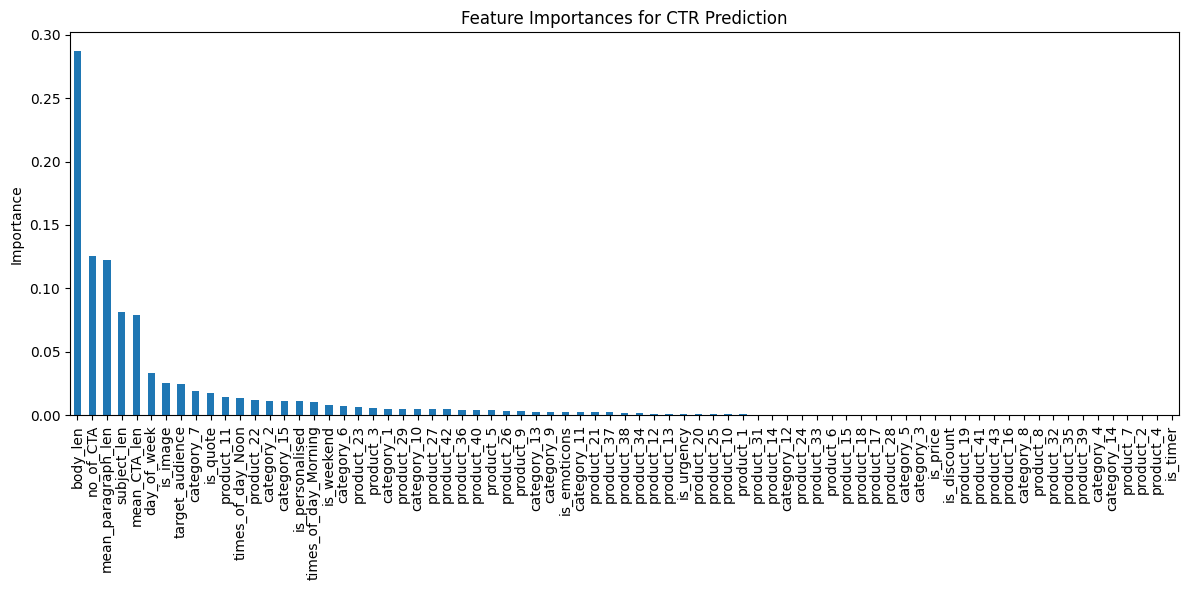

In [11]:
# Plot Feature Importances
feature_importances = pd.Series(rf_reg.feature_importances_, index=X.columns)
plt.figure(figsize=(12,6))
feature_importances.sort_values(ascending=False).plot(kind='bar')
plt.title('Feature Importances for CTR Prediction')
plt.ylabel('Importance')
plt.tight_layout()
plt.show()

### 3.3. Best Time & Day for Email Engagement
This section analyzes the best time and day for email engagement based on the average click rate.

<ipython-input-12-7109eb5236d6>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=engagement_by_day.index, y=engagement_by_day.values, palette='viridis')
<ipython-input-12-7109eb5236d6>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=engagement_by_time.index, y=engagement_by_time.values, palette='magma')


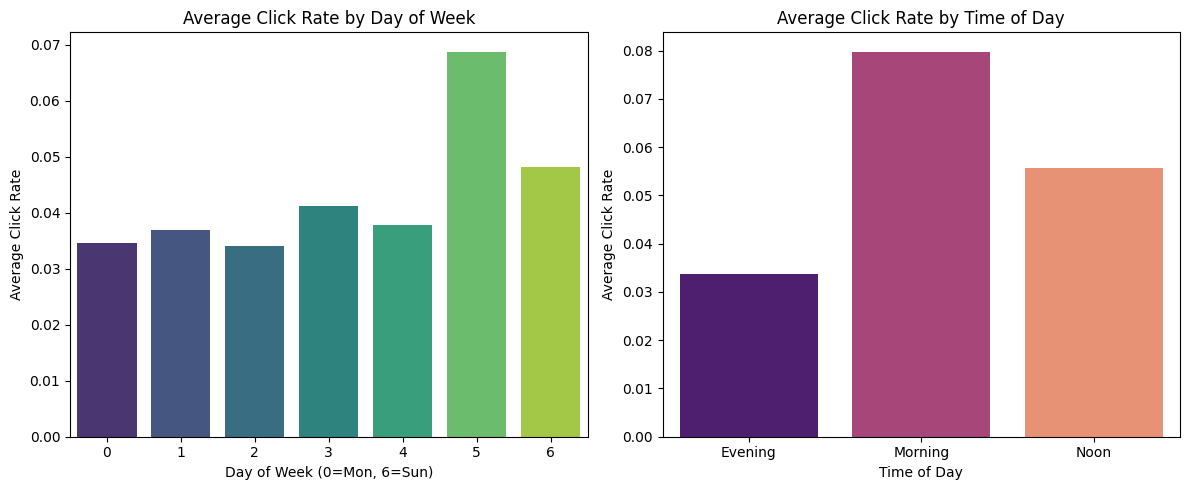

In [12]:
# Group data to calculate average click_rate by day_of_week and times_of_day
engagement_by_day = train.groupby('day_of_week')['click_rate'].mean()
engagement_by_time = train.groupby('times_of_day')['click_rate'].mean()

# Plot the results
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.barplot(x=engagement_by_day.index, y=engagement_by_day.values, palette='viridis')
plt.title('Average Click Rate by Day of Week')
plt.xlabel('Day of Week (0=Mon, 6=Sun)')
plt.ylabel('Average Click Rate')

plt.subplot(1,2,2)
sns.barplot(x=engagement_by_time.index, y=engagement_by_time.values, palette='magma')
plt.title('Average Click Rate by Time of Day')
plt.xlabel('Time of Day')
plt.ylabel('Average Click Rate')

plt.tight_layout()
plt.show()

### 3.4. Email Content Effectiveness: Subject Length vs. Click Rate
This section analyzes the relationship between subject length and click rate.

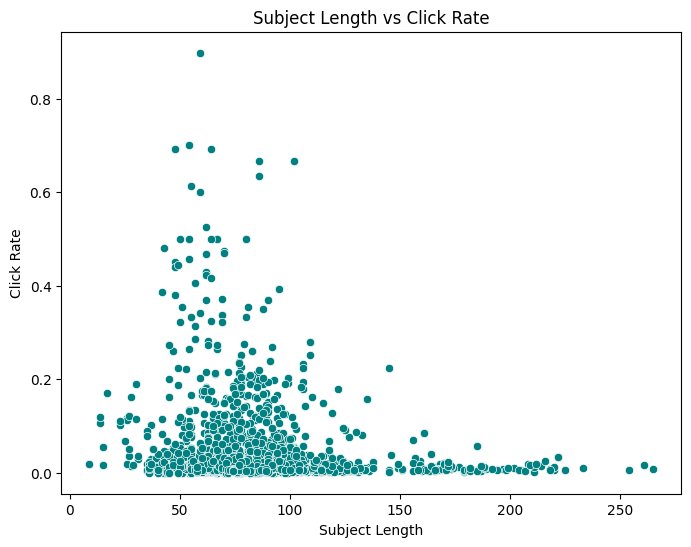

In [13]:
# Scatter plot of subject length vs click rate
plt.figure(figsize=(8,6))
sns.scatterplot(x='subject_len', y='click_rate', data=train, color='teal')
plt.title('Subject Length vs Click Rate')
plt.xlabel('Subject Length')
plt.ylabel('Click Rate')
plt.show()

### 3.5. Sender Analysis and Product/Category Impact on CTR
This section analyzes the impact of senders and product/category on CTR.

#### 3.5.1 Sender Analysis
The average click rate and campaign count by sender are calculated and visualized.


Sender Analysis Sample:
   sender  avg_click_rate  campaign_count
0       0        0.009385               3
1       1        0.002660               1
2       2        0.070796               1
3       3        0.042660            1559
4       6        0.011454              22


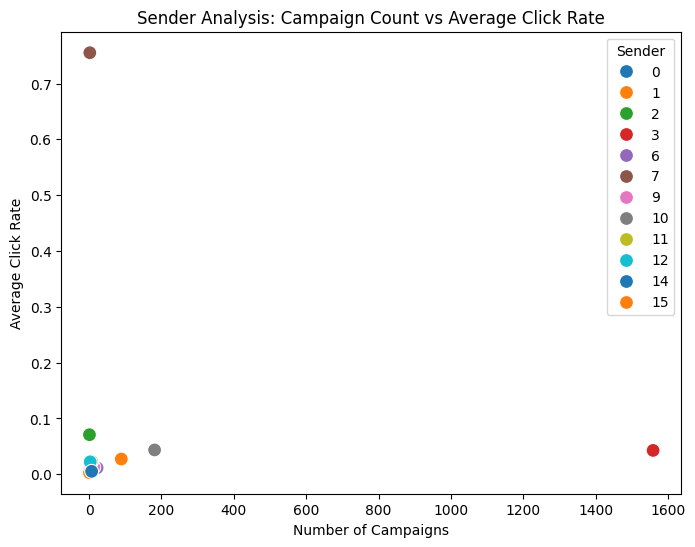

In [14]:
# Group by 'sender' to compute average click_rate and campaign count
sender_stats = train.groupby('sender').agg({'click_rate': ['mean', 'count']})
sender_stats.columns = ['avg_click_rate', 'campaign_count']
sender_stats = sender_stats.reset_index()
print("\nSender Analysis Sample:")
print(sender_stats.head())

# Scatter plot of campaign count vs average click rate
plt.figure(figsize=(8,6))
sns.scatterplot(x='campaign_count', y='avg_click_rate', data=sender_stats, hue='sender', palette='tab10', s=100)
plt.title('Sender Analysis: Campaign Count vs Average Click Rate')
plt.xlabel('Number of Campaigns')
plt.ylabel('Average Click Rate')
plt.legend(title='Sender')
plt.show()

#### 3.5.2 Product/Category Impact
The average click rate per category and per product is analyzed.

<ipython-input-15-67aa440ce5f7>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='category', y='click_rate', data=category_engagement, palette='coolwarm')
<ipython-input-15-67aa440ce5f7>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='product', y='click_rate', data=product_engagement, palette='coolwarm')


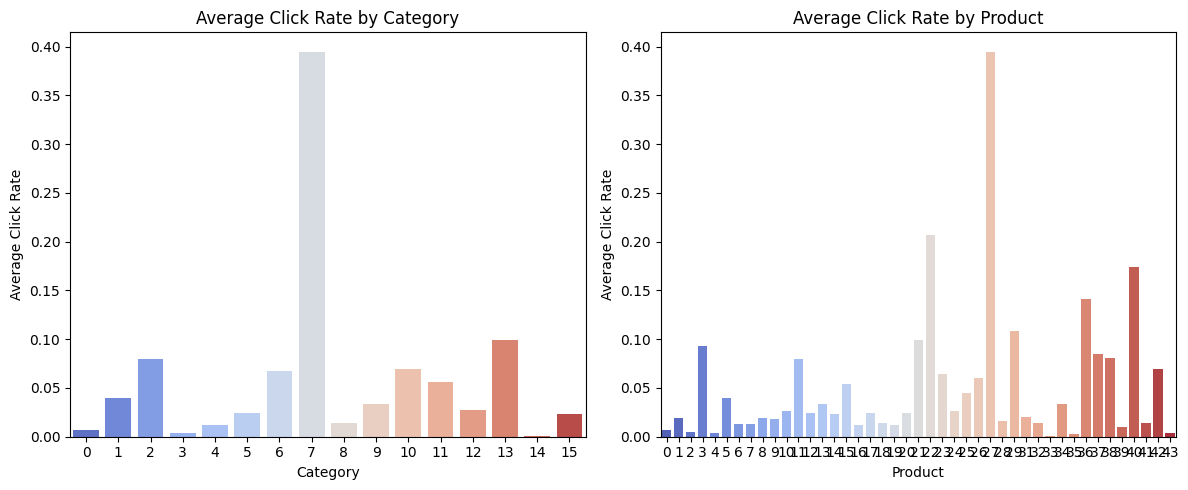

In [15]:
# Group by category and product to compute average click_rate
category_engagement = train.groupby('category')['click_rate'].mean().reset_index()
product_engagement = train.groupby('product')['click_rate'].mean().reset_index()

# Plot the results
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.barplot(x='category', y='click_rate', data=category_engagement, palette='coolwarm')
plt.title('Average Click Rate by Category')
plt.xlabel('Category')
plt.ylabel('Average Click Rate')

plt.subplot(1,2,2)
sns.barplot(x='product', y='click_rate', data=product_engagement, palette='coolwarm')
plt.title('Average Click Rate by Product')
plt.xlabel('Product')
plt.ylabel('Average Click Rate')

plt.tight_layout()
plt.show()

## 4.Hyperparameter Tuning for XGBoost Regressor

This section performs hyperparameter tuning for an XGBoost regressor using GridSearchCV to optimize the model for predicting email CTR. A parameter grid is defined to test combinations of hyperparameters such as n_estimators, max_depth, learning_rate, subsample, and colsample_bytree. The XGBoost regressor is initialized with the objective reg:squarederror, and GridSearchCV is configured for 5-fold cross-validation using R² as the scoring metric. After fitting the grid search to the training data, the best hyperparameters and corresponding R² score are outputted, providing insights into the optimal model configuration for maximizing predictive performance. This process ensures the model is fine-tuned to achieve the best possible results for CTR prediction.

In [16]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for tuning
param_grid_xgb = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.7, 1.0],
    'colsample_bytree': [0.7, 1.0]
}

# Initialize the XGBoost regressor
xgb_reg = xgb.XGBRegressor(objective='reg:squarederror', random_state=42)

# Setup GridSearchCV with 5-fold cross-validation using R² as the scoring metric
grid_search_xgb = GridSearchCV(xgb_reg, param_grid_xgb, cv=5, scoring='r2', n_jobs=-1, verbose=1)
grid_search_xgb.fit(X, y)

# Output the best parameters and corresponding R² score
print("Best parameters:", grid_search_xgb.best_params_)
print("Best CV R² Score:", grid_search_xgb.best_score_)


Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best parameters: {'colsample_bytree': 0.7, 'learning_rate': 0.01, 'max_depth': 7, 'n_estimators': 100, 'subsample': 0.7}
Best CV R² Score: 0.15600858831849174


In [17]:
import lightgbm as lgb
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Assume df_model is already created and processed as before:
# X contains the features, and y contains the 'click_rate' target.
X = df_model.drop('click_rate', axis=1)
y = df_model['click_rate']

# Split data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize LightGBM Regressor
lgb_reg = lgb.LGBMRegressor(random_state=42, objective='regression')

# Define a grid of hyperparameters to search
param_grid_lgb = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7, -1],  # -1 means no limit
    'learning_rate': [0.01, 0.05, 0.1],
    'num_leaves': [31, 50, 70],
    'subsample': [0.7, 1.0],
    'colsample_bytree': [0.7, 1.0]
}

# Setup GridSearchCV with 5-fold cross-validation using R² as the scoring metric
grid_search_lgb = GridSearchCV(lgb_reg, param_grid_lgb, cv=5, scoring='r2', n_jobs=-1, verbose=1)
grid_search_lgb.fit(X_train, y_train)

# Retrieve the best model from grid search
best_lgb = grid_search_lgb.best_estimator_
print("Best parameters for LightGBM:", grid_search_lgb.best_params_)
print("Best CV R² Score for LightGBM: {:.4f}".format(grid_search_lgb.best_score_))

# Evaluate on the validation set
y_pred_lgb = best_lgb.predict(X_val)
mse_lgb = mean_squared_error(y_val, y_pred_lgb)
r2_lgb = r2_score(y_val, y_pred_lgb)

print("\nLightGBM Model Performance on Validation Set:")
print("Mean Squared Error (MSE): {:.4f}".format(mse_lgb))
print("R² Score: {:.4f}".format(r2_lgb))


Fitting 5 folds for each of 432 candidates, totalling 2160 fits
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000253 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 640
[LightGBM] [Info] Number of data points in the train set: 1510, number of used features: 37
[LightGBM] [Info] Start training from score 0.043389
Best parameters for LightGBM: {'colsample_bytree': 0.7, 'learning_rate': 0.1, 'max_depth': -1, 'n_estimators': 100, 'num_leaves': 31, 'subsample': 0.7}
Best CV R² Score for LightGBM: 0.4224

LightGBM Model Performance on Validation Set:
Mean Squared Error (MSE): 0.0022
R² Score: 0.4985


## 5. Conclusion

This notebook provides a comprehensive analysis of email campaign data and builds a predictive model for detail Email Analytics. The model's performance is evaluated, and key insights into email engagement, sender impact, and product/category effectiveness are derived. Further improvements can be made by experimenting with different models and hyperparameters.